In [1]:
import yfinance as yf
import pandas as pd
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import cvxpy as cp
import numpy as np

# Use 30 actively traded stocks in consumers discretionary sector


In [2]:
import yfinance as yf
import pandas as pd

# List of technology stock tickers
stocks = [
    "AMZN", "TSLA", "HD", "MCD", "NKE", "LOW", "SBUX", "BKNG", "TGT", "GM",
    "F", "MAR", "CCL", "YUM", "DHI", "LVS", "NVR", "ROST", "ULTA", "APTV",
    "HAS", "TJX", "WYNN", "BBY", "VFC", "PHM", "RL", "LEN", "GRMN", "EXPE"
]

# List to store DataFrames for each stock
stock_dataframes = []

# Download adjusted close price data for each stock and store in DataFrame
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')

    # Select only the "Adj Close" column and rename it with the stock ticker
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})

    # Append DataFrame to list
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)
print(stock_prices.head())

if stock_prices.isnull().any().any():
    print("NaN values found in the dataset")
else:
    print("No NaN values found in the dataset")


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed

               AMZN       TSLA         HD        MCD        NKE        LOW  \
Date                                                                         
2015-01-02  15.4260  14.620667  83.401009  73.652336  42.926773  57.120422   
2015-01-05  15.1095  14.006000  81.651245  72.838890  42.235638  55.753586   
2015-01-06  14.7645  14.085333  81.401268  72.973160  41.987190  55.880150   
2015-01-07  14.9210  14.063333  84.191246  74.244644  42.854492  57.542305   
2015-01-08  15.0230  14.041333  86.053940  74.521049  43.843765  58.757263   

                 SBUX         BKNG        TGT         GM  ...        HAS  \
Date                                                      ...              
2015-01-02  34.195168  1139.144897  57.678894  27.378906  ...  40.793205   
2015-01-05  33.540161  1094.778320  56.645210  26.978123  ...  40.911949   
2015-01-06  33.267231  1077.203369  56.637550  27.386755  ...  40.377628   
2015-01-07  34.085995  1066.839844  58.781441  28.164747  ...  40.570568 

# C=1 no short

Step 1: Calculate the Covariance Matrix using data of past three years 2021-01-05 to 2024-01-31

In [3]:
# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date] #2021-01-04 to 2024-01-31

# Calculate returns
returns = filtered_data.pct_change().dropna()   #773 rows

# Compute covariance matrix
cov_matrix = returns.cov()
print(cov_matrix.head())

          AMZN      TSLA        HD       MCD       NKE       LOW      SBUX  \
AMZN  0.000545  0.000394  0.000166  0.000068  0.000228  0.000169  0.000181   
TSLA  0.000394  0.001368  0.000165  0.000068  0.000245  0.000183  0.000222   
HD    0.000166  0.000165  0.000242  0.000061  0.000162  0.000228  0.000126   
MCD   0.000068  0.000068  0.000061  0.000107  0.000075  0.000060  0.000094   
NKE   0.000228  0.000245  0.000162  0.000075  0.000431  0.000162  0.000195   

          BKNG       TGT        GM  ...       HAS       TJX      WYNN  \
AMZN  0.000231  0.000192  0.000195  ...  0.000171  0.000138  0.000235   
TSLA  0.000284  0.000226  0.000364  ...  0.000197  0.000173  0.000322   
HD    0.000108  0.000181  0.000167  ...  0.000139  0.000126  0.000116   
MCD   0.000079  0.000062  0.000073  ...  0.000058  0.000067  0.000058   
NKE   0.000204  0.000195  0.000220  ...  0.000168  0.000144  0.000249   

           BBY       VFC       PHM        RL       LEN      GRMN      EXPE  
AMZN  0.000182 

Step 2: Retrieve the recent three month realized stocks returns

In [4]:
#As if we hold the portfolio for 3 months Feb Mar Apr
start_date = datetime(2024, 2, 1)
end_date = datetime(2024, 4, 30)

# Calculate returns for February to April 2024
specific_months_returns = stock_prices.loc[start_date:end_date].pct_change().dropna() # 61rows and 30 columns
print(specific_months_returns.head())

                AMZN      TSLA        HD       MCD       NKE       LOW  \
Date                                                                     
2024-02-02  0.078666 -0.005030 -0.007887 -0.003455 -0.010318 -0.003360   
2024-02-05 -0.008731 -0.036454 -0.005851 -0.037300 -0.010227 -0.006743   
2024-02-06 -0.006811  0.022313  0.003126 -0.004616  0.029394  0.000505   
2024-02-07  0.008158  0.013398  0.018077  0.009415  0.011500  0.016367   
2024-02-08 -0.004046  0.010555  0.002840  0.016009 -0.000193 -0.005864   

                SBUX      BKNG       TGT        GM  ...       HAS       TJX  \
Date                                                ...                       
2024-02-02 -0.004070  0.000826  0.007409  0.001029  ...  0.002402  0.004636   
2024-02-05 -0.005162  0.017861 -0.021720 -0.028784  ... -0.018574 -0.008820   
2024-02-06  0.034158  0.005501  0.014754  0.006351  ...  0.002035  0.004656   
2024-02-07 -0.003763  0.017553  0.015925  0.018144  ...  0.013404  0.007518   
2024-02

Step 3: Set up the Markowitz Portfolio Optimization Problem

In [20]:
# Assuming 'returns' is a pandas DataFrame of asset returns
num_assets = 30
expected_returns = returns.mean().values

# Optimization variables
weights = cp.Variable(num_assets)

# Portfolio return
portfolio_return = weights.T @ expected_returns

# Portfolio variance
portfolio_variance = cp.quad_form(weights, cov_matrix)

# Define your risk tolerance
risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights is 1
    weights >= 0,          # Weights are non-negative
    portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
]

# Objective function to maximize expected return
objective = cp.Maximize(portfolio_return)

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Output optimized weights and portfolio statistics
optimized_weights = weights.value
optimized_return = portfolio_return.value
optimized_variance = portfolio_variance.value

print("Optimized Weights:", optimized_weights)

Optimized Weights: [4.32204290e-08 4.74715502e-08 7.54082643e-08 1.16857725e-07
 3.02985079e-08 7.01409633e-08 3.96603225e-08 1.97742055e-07
 3.56934520e-08 4.24029243e-08 1.59866258e-07 2.71665763e-02
 4.63161582e-08 6.80306608e-08 2.94877910e-07 4.05361609e-08
 1.02797399e-07 6.70360274e-08 3.59067428e-07 2.55643930e-08
 2.52124499e-08 1.01856016e-07 4.29207436e-08 3.16452948e-08
 1.36581926e-08 9.72830903e-01 1.11091822e-07 2.22019802e-07
 4.58996423e-08 6.37523562e-08]


In [21]:
growth_rate = 1+specific_months_returns
daily_returns = growth_rate.dot(optimized_weights)
print(daily_returns.shape)
quarter_return = np.prod(daily_returns)
quarter_return


(61,)


1.043914738775554

In [22]:
print("A Quarter Realized Return is:", quarter_return-1)
print("SD of Daily Portfolio Returns",np.std(daily_returns, ddof=1))

A Quarter Realized Return is: 0.043914738775554074
SD of Daily Portfolio Returns 0.018015986160583204


In [23]:
# Given data
quarter_return
daily_sd = np.std(daily_returns, ddof=1)

# Annualize the returns and standard deviation
annualized_return = quarter_return ** 4 -1
annualized_sd = daily_sd * np.sqrt(252)

# Assume a risk-free rate of 5%
risk_free_rate = 0.05

# Calculate the Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

print("Annualized Return:", annualized_return)
print("Annualized Standard Deviation:", annualized_sd)
print("Sharpe Ratio:", sharpe_ratio)
print("Max weight is", np.max(optimized_weights))


Annualized Return: 0.18757245896836983
Annualized Standard Deviation: 0.2859949140269072
Sharpe Ratio: 0.48103113804124026
Max weight is 0.9728309026237487


# C = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10, float('inf')])

In [24]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn = []
Sharpe =[]
SD = []
Max = []

for i in c_values:
  num_assets = 30
  expected_returns = returns.mean().values

  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 1.5
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]

  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value

  # Given data
  #growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns) # this compares to
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.05

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd

  Realizedreturn.append(annualized_return*100)
  Sharpe.append(sharpe_ratio)
  SD.append(daily_sd*100)
  Max.append(np.max(optimized_weights))






[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [40]:
print(Realizedreturn)
print(len(Realizedreturn))

[18.757270672461026, 46.91225763297291, 48.80472446011457, 71.03757463949695, 96.56257972046961, 78.33877837507627, 69.04114642724501, 56.64097763205109, 42.930420161079354, 34.85303841315752, 29.235239138447987, 29.283687455863316, 28.8771320849442, 28.911494693736174]
14


In [41]:
print(SD)
print(len(SD))

[1.8015990876599515, 1.779377841603261, 2.0042078650081425, 2.474376007482395, 2.758164686804212, 2.9539514807233824, 3.0706392175593744, 3.150918205920249, 3.216478031412414, 3.2514341311163117, 3.2597837614967693, 3.272245827628626, 3.276788891046715, 3.27669546804866]
14


# Factor - model covariance

In [27]:
from google.colab import files
uploaded = files.upload()

Saving 5_Factors.CSV to 5_Factors.CSV


In [42]:

# Load the data, skipping the first two rows to ignore the introductory text
df = pd.read_csv('5_Factors.CSV', skiprows=2)

# Display the first few rows and the column names to confirm the structure
print(df.head())
print(df.columns)





   Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
0    19630701   -0.67  0.02 -0.35  0.03  0.13  0.012
1    19630702    0.79 -0.28  0.28 -0.08 -0.21  0.012
2    19630703    0.63 -0.18 -0.10  0.13 -0.25  0.012
3    19630705    0.40  0.09 -0.28  0.07 -0.30  0.012
4    19630708   -0.63  0.07 -0.20 -0.27  0.06  0.012
Index(['Unnamed: 0', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA', 'RF'], dtype='object')


In [43]:
df['Unnamed: 0'] = pd.to_datetime(df['Unnamed: 0'], format='%Y%m%d')
df.set_index('Unnamed: 0', inplace=True)
# Filter the data to match the date
df = df[(df.index >= pd.Timestamp('2021-01-01')) & (df.index <= pd.Timestamp('2024-01-31'))]
print(df) # 774 rows

            Mkt-RF   SMB   HML   RMW   CMA     RF
Unnamed: 0                                       
2021-01-04   -1.41  0.16  0.58 -0.64  0.10  0.000
2021-01-05    0.86  1.32  0.49  0.36  0.55  0.000
2021-01-06    0.79  3.15  3.94  0.06  0.53  0.000
2021-01-07    1.76  0.02 -0.83 -1.50 -0.20  0.000
2021-01-08    0.51 -1.01 -1.37 -0.43 -0.37  0.000
...            ...   ...   ...   ...   ...    ...
2024-01-25    0.46  0.20  0.56 -0.19  0.55  0.022
2024-01-26   -0.02  0.35 -0.27  0.22 -0.02  0.022
2024-01-29    0.86  0.89 -0.59 -1.13 -0.31  0.022
2024-01-30   -0.13 -0.96  0.84  1.00  0.13  0.022
2024-01-31   -1.74 -0.89 -0.30 -0.21  0.37  0.022

[774 rows x 6 columns]


In [44]:
# Merge the stock prices with the factors on date
returns.index = pd.to_datetime(returns.index)
df.index = pd.to_datetime(df.index)
data = pd.concat([returns, df], axis=1).dropna()  # 773 Rows  2021-01-05 - 2024-01-30
data

,AMZN,TSLA,HD,MCD,NKE,LOW,SBUX,BKNG,TGT,GM,...,RL,LEN,GRMN,EXPE,Mkt-RF,SMB,HML,RMW,CMA,RF
2021-01-05,0.010004,0.007317,0.008071,0.005994,0.008066,0.003367,0.003298,0.011086,0.015425,0.028388,...,0.026350,-0.007540,-0.002020,0.043922,0.86,1.32,0.49,0.36,0.55,0.000
2021-01-06,-0.024897,0.028390,0.005713,-0.002270,0.007930,0.013361,0.007250,0.028217,0.047403,0.031685,...,0.052308,-0.005698,0.007760,0.045793,0.79,3.15,3.94,0.06,0.53,0.000
2021-01-07,0.007577,0.079447,-0.004896,0.004645,0.018265,0.003925,-0.008062,-0.004427,0.011539,0.007911,...,0.025037,0.032747,0.017409,-0.007879,1.76,0.02,-0.83,-1.50,-0.20,0.000
2021-01-08,0.006496,0.078403,0.010629,0.018351,0.009658,0.008185,0.022448,0.018613,0.013082,-0.006002,...,-0.024068,-0.030387,0.003455,0.012158,0.51,-1.01,-1.37,-0.43,-0.37,0.000
2021-01-11,-0.021519,-0.078214,0.007953,-0.007597,0.004783,0.007695,-0.010126,-0.026416,0.008678,0.045286,...,0.010139,0.033928,-0.006149,-0.007360,-0.51,0.54,1.26,-0.17,0.45,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-25,0.005610,-0.121253,0.010655,-0.010751,0.000099,0.007267,0.006193,0.001859,0.021408,0.013256,...,0.020283,0.027563,-0.000560,0.025106,0.46,0.20,0.56,-0.19,0.55,0.022
2024-01-26,0.008685,0.003395,0.012337,-0.016655,0.019649,-0.000472,0.002052,0.004667,0.002462,0.000569,...,0.015862,-0.004962,-0.002399,-0.002429,-0.02,0.35,-0.27,0.22,-0.02,0.022
2024-01-29,0.013449,0.041910,0.001126,0.000171,0.010998,-0.000660,0.010776,0.009740,-0.007086,0.005969,...,0.009368,0.008020,0.003607,0.013493,0.86,0.89,-0.59,-1.13,-0.31,0.022
2024-01-30,-0.014015,0.003457,0.003936,0.008005,0.002888,0.012651,0.002985,0.000357,-0.007066,0.077988,...,0.006944,0.010029,-0.026600,-0.014677,-0.13,-0.96,0.84,1.00,0.13,0.022


In [45]:
factors = df[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']]

# Convert these to numeric if not already
factors = factors.apply(pd.to_numeric, errors='coerce')

# Drop any rows with NaN values that might have been introduced
factors = factors.dropna()

# Calculate the covariance matrix
factor_covariance_matrix = factors.cov()

# Display the covariance matrix
print(factor_covariance_matrix)

          Mkt-RF       SMB       HML       RMW       CMA
Mkt-RF  1.337839  0.200752 -0.439214 -0.295037 -0.338805
SMB     0.200752  0.541250  0.104861 -0.215985 -0.001800
HML    -0.439214  0.104861  1.109992  0.323820  0.494091
RMW    -0.295037 -0.215985  0.323820  0.510852  0.178210
CMA    -0.338805 -0.001800  0.494091  0.178210  0.397571


Step 2: Run the linear regression

In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
from datetime import datetime
'''
# List of technology stock tickers
stocks = [
    "AMZN", "TSLA", "HD", "MCD", "NKE", "LOW", "SBUX", "BKNG", "TGT", "GM",
    "F", "MAR", "CCL", "YUM", "DHI", "LVS", "NVR", "ROST", "ULTA", "APTV",
    "HAS", "TJX", "WYNN", "BBY", "VFC", "PHM", "RL", "LEN", "GRMN", "EXPE"
]

# Download adjusted close price data for each stock and store in DataFrame
stock_dataframes = []
for stock in stocks:
    print(f"Downloading data for {stock}...")
    stock_data = yf.download(stock, start='2015-01-01')
    stock_data = stock_data[['Adj Close']].rename(columns={'Adj Close': stock})
    stock_dataframes.append(stock_data)

# Concatenate DataFrames into a single DataFrame
stock_prices = pd.concat(stock_dataframes, axis=1)

# Define start and end dates directly
start_date = datetime(2021, 1, 4)
end_date = datetime(2024, 1, 31)

# Filter the data for the desired date range
filtered_data = stock_prices.loc[start_date:end_date]

# Calculate returns
returns = filtered_data.pct_change().dropna()
'''
# Run linear regression
factor_levels = data[['Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']].dropna()

# Dictionary to hold regression results
regressions = {}
for stock in stocks:
    y = returns[stock].dropna()
    X = factor_levels.loc[y.index]  # Align the index of factors with the stock returns
    X = sm.add_constant(X)  # Add constant term to the model
    model = sm.OLS(y, X)
    results = model.fit()
    regressions[stock] = {
        'params': results.params,
        'resid': results.resid,
        'predict': results.predict()
    }

# Extract beta coefficients for each stock into a DataFrame
betas_dict = {}
for stock, values in regressions.items():
    params = values['params']
    if isinstance(params, pd.Series):
        betas_dict[stock] = params.values
    else:
        betas_dict[stock] = params.iloc[:, 0].values

betas = pd.DataFrame(betas_dict, index=['const', 'Mkt-RF', 'SMB', 'HML', 'RMW', 'CMA']).T
print("Beta Coefficients:")
print(betas)

# Calculate the covariance matrix of factor levels (excluding the intercept)
factor_cov_matrix = factor_levels.cov()

# Calculate idiosyncratic variance (variance of residuals)
idiosyncratic_var = {stock: regressions[stock]['resid'].var() for stock in stocks}

# Asset covariance matrix calculation using factor model
# Initialize an empty DataFrame
asset_cov_matrix = pd.DataFrame(index=stocks, columns=stocks)

# Populate the asset covariance matrix
for stock_i in stocks:
    for stock_j in stocks:
        beta_i = regressions[stock_i]['params'].drop('const').values  # Exclude intercept
        beta_j = regressions[stock_j]['params'].drop('const').values  # Exclude intercept
        if stock_i == stock_j:
            # Diagonal elements: Variance from factors + idiosyncratic variance
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_i)) + idiosyncratic_var[stock_i]
        else:
            # Off-diagonal elements: Covariance from factors only
            asset_cov_matrix.loc[stock_i, stock_j] = np.dot(beta_i.T, np.dot(factor_cov_matrix, beta_j))

print("Asset Covariance Matrix:")
print(asset_cov_matrix)


Beta Coefficients:
         const    Mkt-RF       SMB       HML       RMW       CMA
AMZN  0.000122  0.012199 -0.004237 -0.000833 -0.000815 -0.009980
TSLA  0.000660  0.013522  0.001212 -0.002655 -0.008886 -0.008906
HD    0.000155  0.008996  0.004257 -0.001608  0.007667 -0.001161
MCD   0.000177  0.006293 -0.002159 -0.000325  0.002593  0.003450
NKE  -0.000551  0.011411  0.001150 -0.000943  0.003233 -0.001303
LOW   0.000197  0.009098  0.005254 -0.001091  0.006897 -0.002310
SBUX -0.000250  0.009956 -0.000166 -0.001159  0.001800  0.000874
BKNG  0.000557  0.011324 -0.000840  0.004521 -0.003716 -0.004188
TGT  -0.000400  0.010335  0.003138  0.000263  0.003745 -0.001029
GM   -0.000247  0.013270  0.005729  0.007589 -0.000847 -0.004983
F     0.000395  0.014010  0.006888  0.005549  0.000065 -0.001389
MAR   0.000627  0.011226  0.002825  0.003652 -0.000228 -0.001017
CCL   0.000294  0.016583  0.007921  0.007076 -0.008598 -0.007667
YUM   0.000076  0.007143 -0.000903  0.000043  0.001682  0.001439
DHI   

In [47]:
import pandas as pd

# Assuming regressions dictionary contains regression results for each ETF
# Extract beta coefficients for each ETF into a DataFrame
betas = pd.DataFrame({stock: values['params'] for stock, values in regressions.items()})

# Optionally, if you're using Jupyter Notebook, simply write 'betas' without print() for a nicer format:
betas


,AMZN,TSLA,HD,MCD,NKE,LOW,SBUX,BKNG,TGT,GM,...,HAS,TJX,WYNN,BBY,VFC,PHM,RL,LEN,GRMN,EXPE
const,0.000122,0.000660,0.000155,0.000177,-0.000551,0.000197,-0.000250,0.000557,-0.000400,-0.000247,...,-0.000811,0.000262,0.000098,-0.000513,-0.002079,0.000975,0.000269,0.000818,-0.000034,0.000325
Mkt-RF,0.012199,0.013522,0.008996,0.006293,0.011411,0.009098,0.009956,0.011324,0.010335,0.013270,...,0.008979,0.008607,0.011933,0.011089,0.011939,0.012284,0.012264,0.011636,0.008968,0.012447
SMB,-0.004237,0.001212,0.004257,-0.002159,0.001150,0.005254,-0.000166,-0.000840,0.003138,0.005729,...,0.003266,0.001966,0.004147,0.008148,0.011036,0.009677,0.008975,0.008730,0.002318,0.005083
HML,-0.000833,-0.002655,-0.001608,-0.000325,-0.000943,-0.001091,-0.001159,0.004521,0.000263,0.007589,...,0.000789,0.001890,0.003082,0.000603,0.003642,-0.002602,0.003206,-0.003948,-0.000743,0.005235
RMW,-0.000815,-0.008886,0.007667,0.002593,0.003233,0.006897,0.001800,-0.003716,0.003745,-0.000847,...,0.002905,0.002690,-0.007385,0.007315,0.004861,0.008798,0.005219,0.008001,0.002049,-0.003161
CMA,-0.009980,-0.008906,-0.001161,0.003450,-0.001303,-0.002310,0.000874,-0.004188,-0.001029,-0.004983,...,-0.001014,-0.002035,0.000721,-0.002730,-0.003357,0.000301,-0.003133,0.000529,-0.001167,-0.007530


Step 3: Compute the Covariance matrix using
$$\Sigma_{R} = \beta^{T} \Sigma_{F} \beta + \Sigma_{\sigma}$$

In [48]:
c_values= np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])
# float('inf')
print(c_values)
Realizedreturn_f = []
Sharpe_f =[]
SD_f = []
Max_f = []


for i in c_values:
  expected_returns = returns.mean().values

  # Optimization variables
  num_assets = 30
  # Optimization variables
  weights_pos = cp.Variable(num_assets, nonneg=True)  # Positive weights
  weights_neg = cp.Variable(num_assets, nonneg=True)  # Negative weights

  # Portfolio return
  portfolio_return = (weights_pos - weights_neg).T @ expected_returns

  # Portfolio variance
  portfolio_variance = cp.quad_form(weights_pos - weights_neg, asset_cov_matrix)

  # Define your risk tolerance
  risk_tolerance = 0.0005  # Adjust this value based on your risk appetite

  # Constraints
  constraints = [
      cp.sum(weights_pos) - cp.sum(weights_neg) == 1,  # Sum of weights is 1
      cp.sum(weights_pos) + cp.sum(weights_neg) == i,  # Sum of absolute values of weights is 2
      portfolio_variance <= risk_tolerance  # Risk does not exceed tolerance
  ]
  # Objective function to maximize expected return
  objective = cp.Maximize(portfolio_return)

  # Define the problem
  problem = cp.Problem(objective, constraints)

  # Solve the problem
  problem.solve()

  # Output optimized weights and portfolio statistics
  optimized_weights = (weights_pos - weights_neg).value
  optimized_return = portfolio_return.value
  optimized_variance = portfolio_variance.value

  #print("Optimized Weights:", optimized_weights)
  growth_rate = 1+specific_months_returns
  daily_returns = growth_rate.dot(optimized_weights)
  quarter_return = np.prod(daily_returns)
  # Given data
  quarter_return
  daily_sd = np.std(daily_returns, ddof=1)

  # Annualize the returns and standard deviation
  annualized_return = quarter_return ** 4 -1
  annualized_sd = daily_sd * np.sqrt(252)

  # Assume a risk-free rate of 5%
  risk_free_rate = 0.0005

  # Calculate the Sharpe Ratio
  sharpe_ratio = (annualized_return - risk_free_rate) / annualized_sd
  weight_diff = (weights_pos - weights_neg).value
  num_positive = np.sum(weight_diff > 0)
  num_negative = np.sum(weight_diff < 0)


  Realizedreturn_f.append(annualized_return*100)
  Sharpe_f.append(sharpe_ratio)
  SD_f.append(daily_sd*100)
  Max_f.append(np.max(weight_diff))
  #print("Annualized Return:", annualized_return)
  #print("Annualized Standard Deviation:", annualized_sd)
  #print("Sharpe Ratio:", sharpe_ratio)


[ 1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.  10. ]


In [49]:
print(Sharpe_f)
print(len(Sharpe_f))

[0.6349485450026365, 1.3696218442383452, 1.743320094012099, 1.8559340986763897, 1.4166607655318992, 1.1289237006787654, 0.9058934509743958, 0.592523186851157, 0.43329310970858137, 0.24626556423680337, -0.030739110668308076, -0.06175030958996114, -0.061578673886267206, -0.061757431840412415]
14


In [50]:
print(Realizedreturn_f)

[18.50176583121952, 45.51454459450075, 63.23540469609581, 73.39730466318144, 59.3568377078262, 49.67910699923448, 41.1827040588924, 27.414169273931744, 20.341838694700098, 11.628459876929732, -1.3929985909758136, -2.847197195052442, -2.839163107767151, -2.847531268008907]


In [51]:
print(SD_f)

[1.8306239152175687, 2.09108603110093, 2.2831758655857475, 2.489552778610494, 2.637173062819316, 2.7693101641274103, 2.8602887010500417, 2.909220558360754, 2.9501177327701957, 2.961739358623257, 2.9571566978434563, 2.955552283335785, 2.9555714193136207, 2.9555521932182485]


# Return Comparison Graph

In [52]:
print(len(Realizedreturn))
print(len(Realizedreturn))

14
14


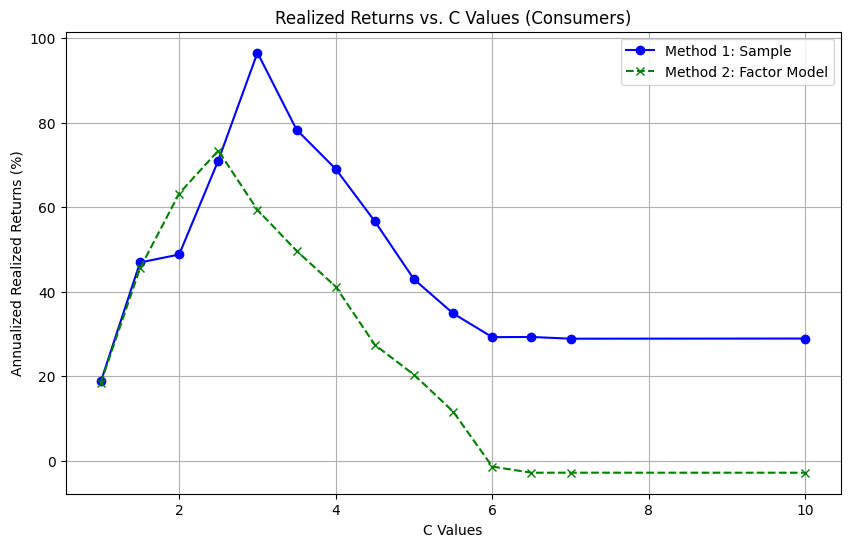

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Realizedreturn, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Realizedreturn_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('Realized Returns vs. C Values (Consumers)')
plt.xlabel('C Values')
plt.ylabel('Annualized Realized Returns (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


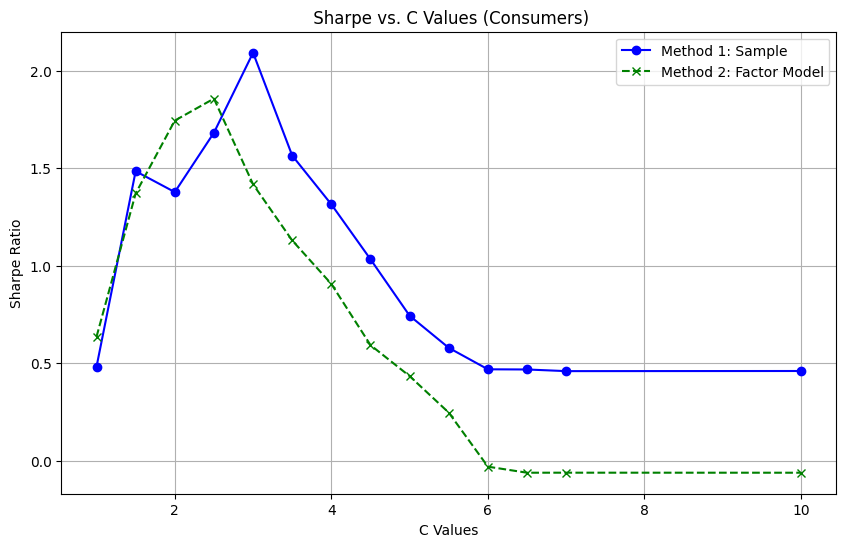

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Sharpe, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [Realizedreturn[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Sharpe_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title(' Sharpe vs. C Values (Consumers)')
plt.xlabel('C Values')
plt.ylabel('Sharpe Ratio')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


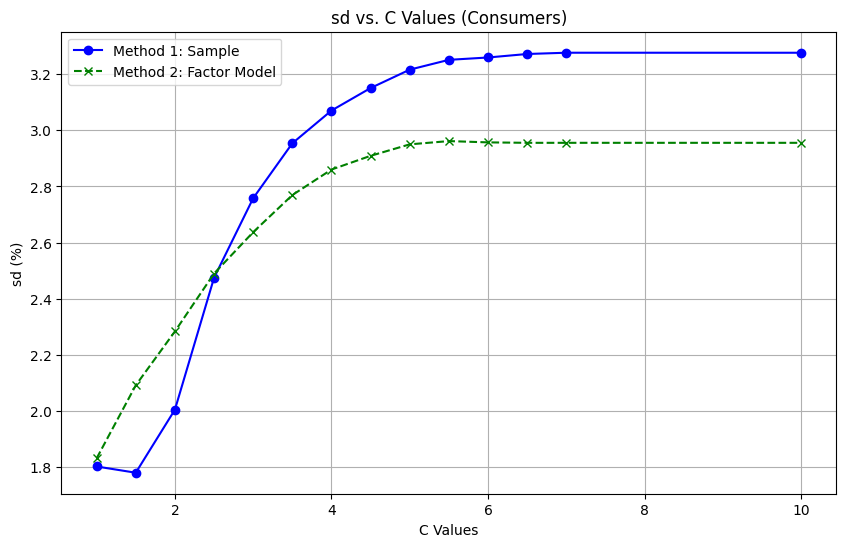

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np



# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, SD, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, SD_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('sd vs. C Values (Consumers)')
plt.xlabel('C Values')
plt.ylabel('sd (%)')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()


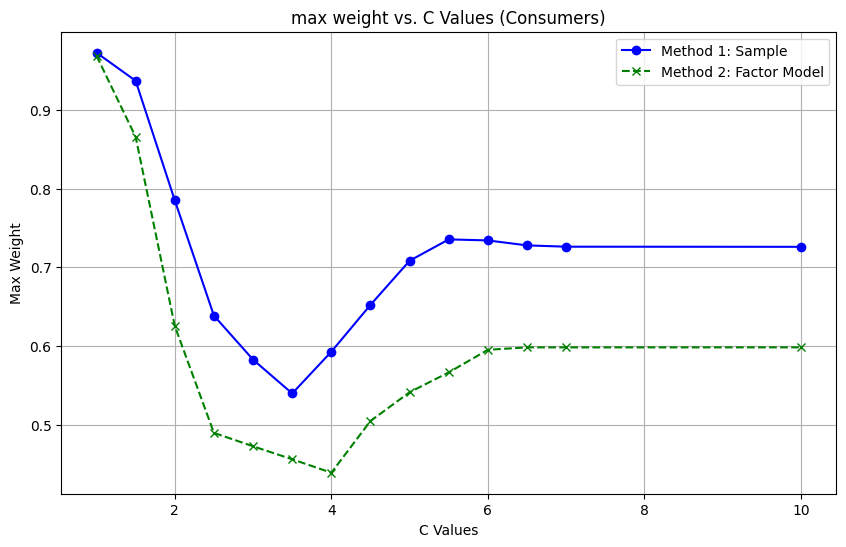

In [56]:
import numpy as np
import matplotlib.pyplot as plt

# Values of C
c_values = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7, 10])

# Corresponding annualized realized returns (in percentage)
import numpy as np


# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(c_values, Max, marker='o', linestyle='-', color='b',label='Method 1: Sample')  # Ignore the last value (infinity)
# plt.scatter([c_values[-1]], [annualized_returns[-1]], color='r')  # Plot the infinity case separately in red
plt.plot(c_values, Max_f, marker='x', linestyle='--', color='g', label='Method 2: Factor Model')

plt.title('max weight vs. C Values (Consumers)')
plt.xlabel('C Values')
plt.ylabel('Max Weight')
plt.grid(True)
plt.legend()  # This will automatically add the legend to the plot
plt.show()
